In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings

In [2]:
Data = pd.read_csv('D://D/ماشین لرنینگ/Bank_Personal_Loan_Modelling(1).csv')
Data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
df = pd.DataFrame(Data)
df

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
df['Experience_p'] = abs(df['Experience'])

In [6]:
df.drop('Experience', axis=1, inplace = True)

In [7]:
df

,ID,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Experience_p
0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0,1
1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0,19
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0,15
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0,9
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,40,92697,1,1.9,3,0,0,0,0,1,0,3
4996,4997,30,15,92037,4,0.4,1,85,0,0,0,1,0,4
4997,4998,63,24,93023,2,0.3,3,0,0,0,0,0,0,39
4998,4999,65,49,90034,3,0.5,2,0,0,0,0,1,0,40


In [8]:
# convert / to . in notepad++

In [9]:
df.describe()

,ID,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Experience_p
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,20.134600
std,1443.520003,11.463166,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,11.415189
min,1.000000,23.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,10.000000
50%,2500.500000,45.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,20.000000
75%,3750.250000,55.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,30.000000
max,5000.000000,67.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,43.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Income             5000 non-null   int64  
 3   ZIPCode            5000 non-null   int64  
 4   Family             5000 non-null   int64  
 5   CCAvg              5000 non-null   float64
 6   Education          5000 non-null   int64  
 7   Mortgage           5000 non-null   int64  
 8   PersonalLoan       5000 non-null   int64  
 9   SecuritiesAccount  5000 non-null   int64  
 10  CDAccount          5000 non-null   int64  
 11  Online             5000 non-null   int64  
 12  CreditCard         5000 non-null   int64  
 13  Experience_p       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [11]:
df.isnull().sum()

ID                   0
Age                  0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
Experience_p         0
dtype: int64

In [12]:
print(pd.unique(Data["Family"]))
print(pd.unique(Data["Education"]))
print(pd.unique(Data["PersonalLoan"]))
print(pd.unique(Data["SecuritiesAccount"]))
print(pd.unique(Data["CDAccount"]))
print(pd.unique(Data["Online"]))
print(pd.unique(Data["CreditCard"]))

[4 3 1 2]
[1 2 3]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]


In [13]:
# preprocessing

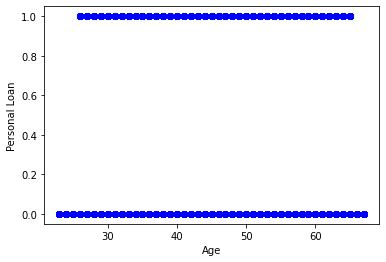

In [14]:
plt.scatter(df['Age'], df['PersonalLoan'], color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Age')
plt.ylabel('Personal Loan')
plt.show()

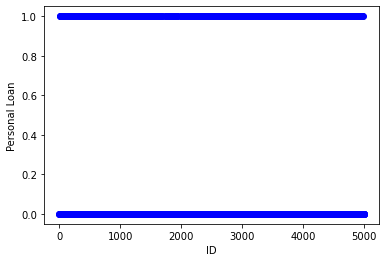

In [15]:
plt.scatter(df['ID'], df['PersonalLoan'], color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('ID')
plt.ylabel('Personal Loan')
plt.show()

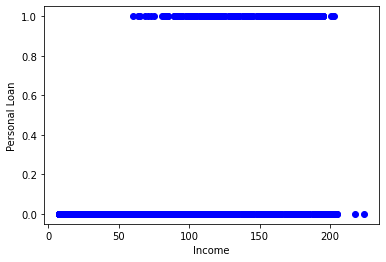

In [16]:
plt.scatter(df['Income'], df['PersonalLoan'], color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Income')
plt.ylabel('Personal Loan')
plt.show()

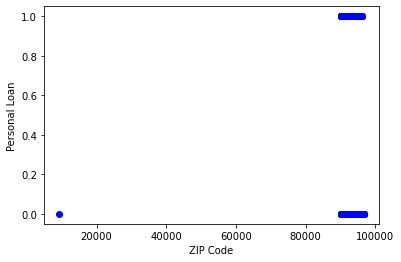

In [17]:
plt.scatter(df['ZIPCode'], df['PersonalLoan'], color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('ZIP Code')
plt.ylabel('Personal Loan')
plt.show()

In [18]:
one = len(df[df["Family"] == 1])/len(df['Family'])
tow = len(df[df["Family"] == 2])/len(df['Family'])
three = len(df[df["Family"] == 3])/len(df['Family'])
four = len(df[df["Family"] == 4])/len(df['Family'])
print(one, tow, three, four)

0.2944 0.2592 0.202 0.2444


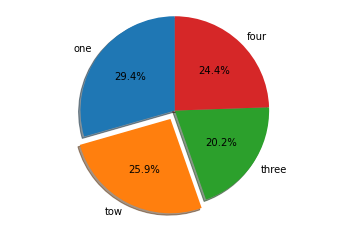

In [19]:
# df['Family']

# pie plot

# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = 'one', 'tow', 'three', 'four'
sizes = [29.44, 25.92, 20.2, 24.44]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

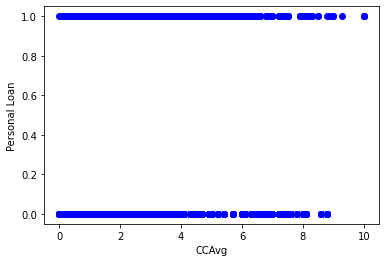

In [20]:
plt.scatter(df['CCAvg'], df['PersonalLoan'], color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('CCAvg')
plt.ylabel('Personal Loan')
plt.show()

In [21]:
one = (len(df[df["Education"] == 1])/len(df["Education"]))*100
tow = (len(df[df["Education"] == 2])/len(df["Education"]))*100
three = (len(df[df["Education"] == 3])/len(df["Education"]))*100
print(one, tow, three)

41.92 28.060000000000002 30.020000000000003


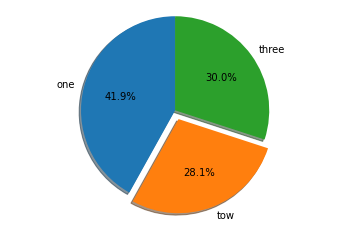

In [22]:
# df['Education']

# pie plot

# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = 'one', 'tow', 'three'
sizes = [41.92 ,28.060000000000002 ,30.020000000000003]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

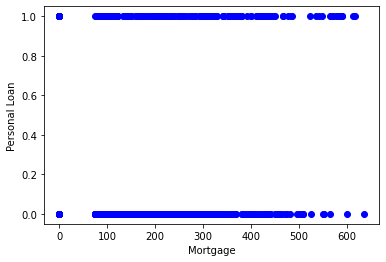

In [23]:
plt.scatter(df['Mortgage'], df['PersonalLoan'], color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Mortgage')
plt.ylabel('Personal Loan')
plt.show()

In [24]:
zero = (len(df[df["SecuritiesAccount"] == 0])/len(df["SecuritiesAccount"]))*100
one = (len(df[df["SecuritiesAccount"] == 1])/len(df["SecuritiesAccount"]))*100
print(zero ,one)

89.56 10.440000000000001


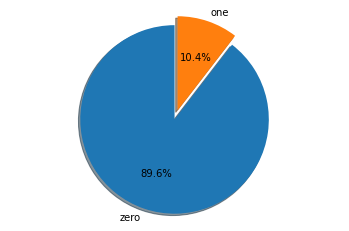

In [25]:
# df['Securities Account']

# pie plot

# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = 'zero', 'one'
sizes = [89.56 ,10.440000000000001]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [26]:
zero = (len(df[df["CDAccount"] == 0])/len(df["CDAccount"]))*100
one = (len(df[df["CDAccount"] == 1])/len(df["CDAccount"]))*100
print(zero ,one)

93.96 6.04


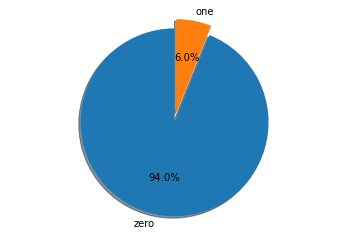

In [27]:
# df['CD Account']

# pie plot

# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = 'zero', 'one'
sizes = [93.96 ,6.04]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [28]:
zero = (len(df[df["Online"] == 0])/len(df["Online"]))*100
one = (len(df[df["Online"] == 1])/len(df["Online"]))*100
print(zero ,one)

40.32 59.68


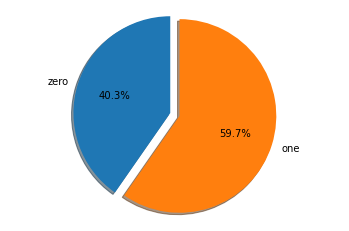

In [29]:
# df['Online']

# pie plot

# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = 'zero', 'one'
sizes = [40.32 ,59.68]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [30]:
zero = (len(df[df["CreditCard"] == 0])/len(df["CreditCard"]))*100
one = (len(df[df["CreditCard"] == 1])/len(df["CreditCard"]))*100
print(zero ,one)

70.6 29.4


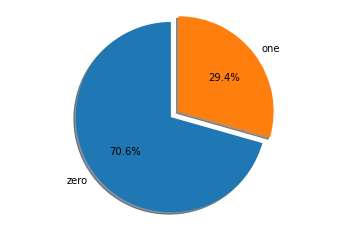

In [31]:
# df['CreditCard']

# pie plot

# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = 'zero', 'one'
sizes = [70.6 ,29.4]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

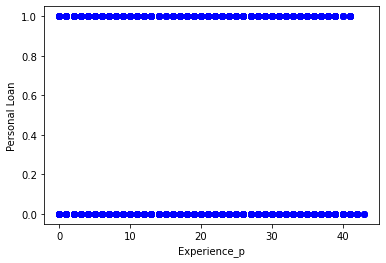

In [32]:
plt.scatter(df['Experience_p'], df['PersonalLoan'], color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Experience_p')
plt.ylabel('Personal Loan')
plt.show()

In [33]:
df

,ID,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Experience_p
0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0,1
1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0,19
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0,15
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0,9
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,40,92697,1,1.9,3,0,0,0,0,1,0,3
4996,4997,30,15,92037,4,0.4,1,85,0,0,0,1,0,4
4997,4998,63,24,93023,2,0.3,3,0,0,0,0,0,0,39
4998,4999,65,49,90034,3,0.5,2,0,0,0,0,1,0,40


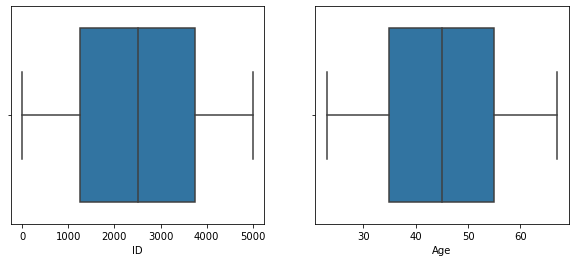

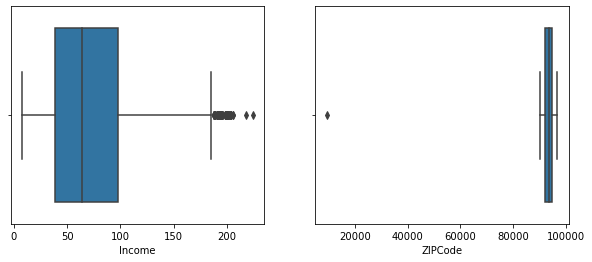

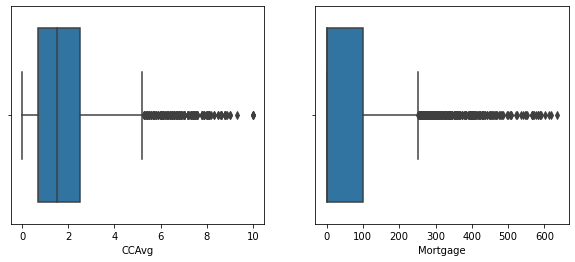

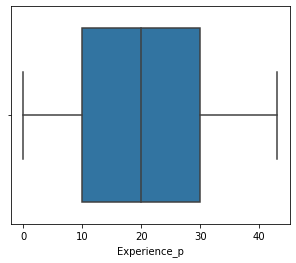

In [34]:
num = ['ID', 'Age', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage']

i = 0
while i<6:
    fig = plt.figure(figsize = (10, 4))
    plt.subplot(1,2,1)
    sns.boxplot(x = num[i], data = df)
    i+=1
    plt.subplot(1,2,2)
    sns.boxplot(x = num[i], data = df)
    i+=1
    plt.show()

plt.figure(figsize =(5,4))
sns.boxplot(x = df['Experience_p'], data = df)
plt.show()

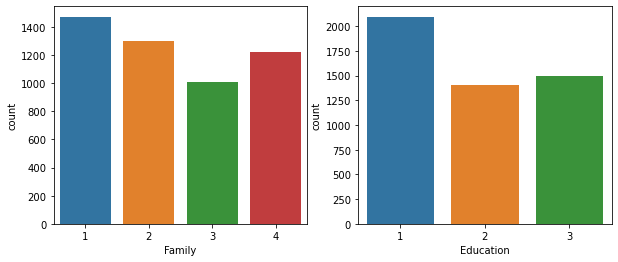

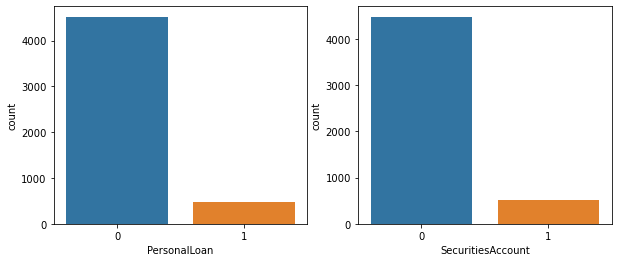

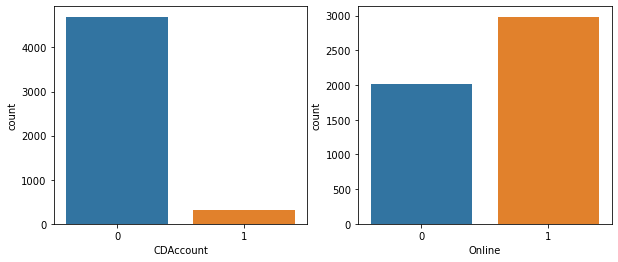

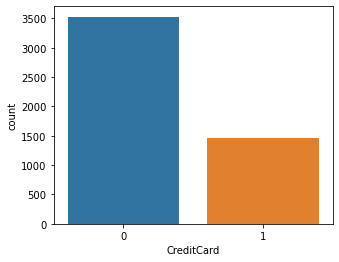

In [35]:
Categorical = ['Family', 'Education', 'PersonalLoan', 'SecuritiesAccount', 'CDAccount', 'Online']

i = 0
while i < 6:
    fig = plt.figure(figsize = (10, 4))
    plt.subplot(1,2,1)
    sns.countplot(x = Categorical[i], data = df)
    i+=1
    plt.subplot(1,2,2)
    sns.countplot(x = Categorical[i], data = df)
    i+=1
    plt.show()
    
plt.figure(figsize = (5,4))
sns.countplot(x = df['CreditCard'], data = df)
plt.show()

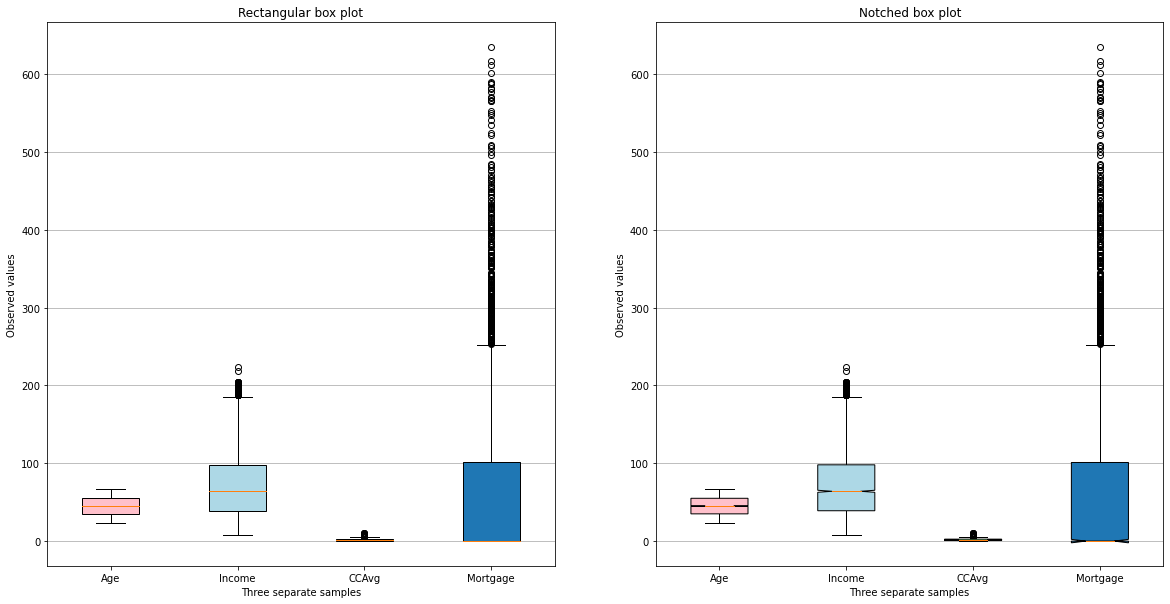

In [36]:
# Random test data
x = pd.DataFrame(df, columns = ['Age', 'Income', 'CCAvg', 'Mortgage'])
labels = ['Age', 'Income', 'CCAvg', 'Mortgage']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# rectangular box plot
bplot1 = ax1.boxplot(x,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

# notch shape box plot
bplot2 = ax2.boxplot(x,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Notched box plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()

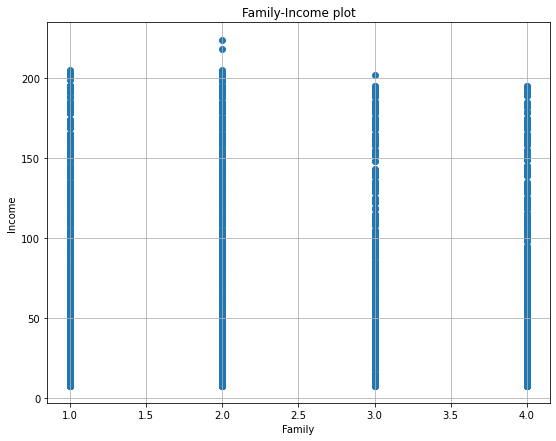

In [37]:
# x = family , y = income

plt.figure(figsize = (9,7))
plt.scatter(df['Family'], df['Income'])
plt.xlabel("Family")
plt.ylabel("Income")
plt.title("Family-Income plot")
plt.grid()
plt.show()

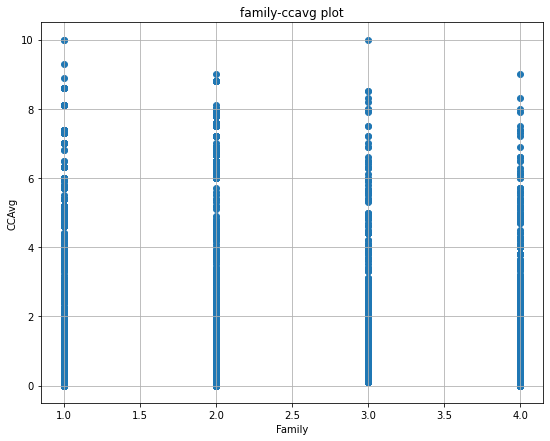

In [38]:
# x = family , y = ccavg

plt.figure(figsize = (9,7))
plt.scatter(df['Family'], df['CCAvg'])
plt.xlabel("Family")
plt.ylabel("CCAvg")
plt.title("family-ccavg plot")
plt.grid()
plt.show()

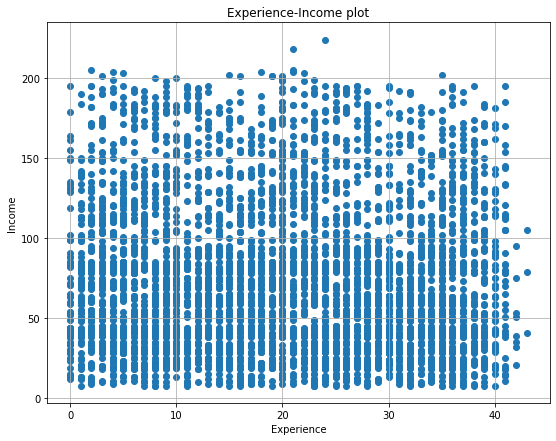

In [39]:
# x = Experience_p

plt.figure(figsize = (9,7))
plt.scatter(df['Experience_p'], df['Income'])
plt.xlabel("Experience")
plt.ylabel("Income")
plt.title("Experience-Income plot")
plt.grid()
plt.show()

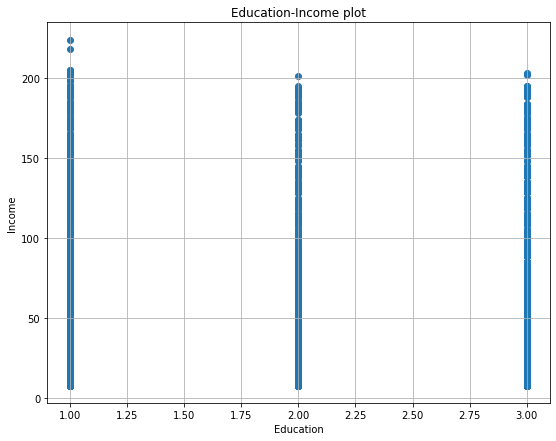

In [40]:
plt.figure(figsize = (9,7))
plt.scatter(df['Education'], df['Income'])
plt.xlabel("Education")
plt.ylabel("Income")
plt.title("Education-Income plot")
plt.grid()
plt.show()

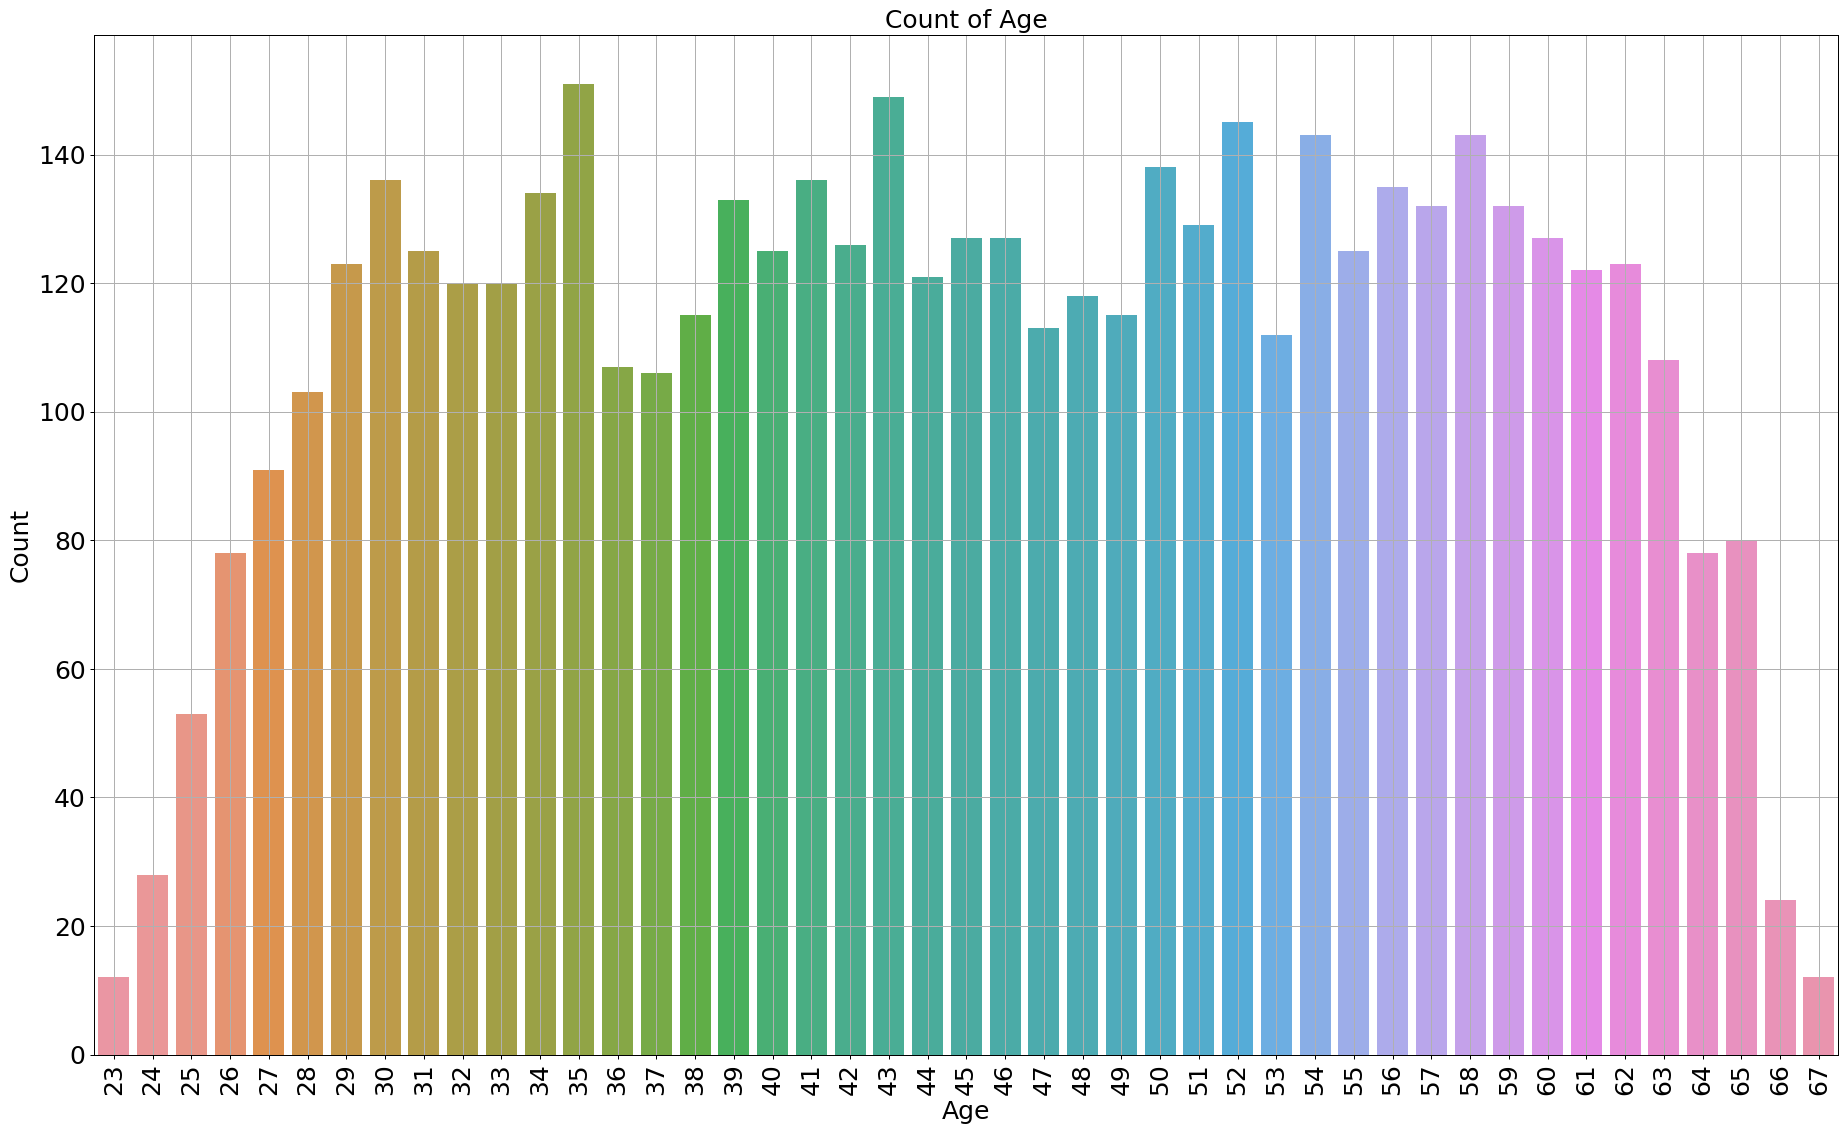

In [41]:
plt.figure(figsize = (25, 15), dpi = 90)
ax = sns.countplot(x = "Age", data = df)
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Age", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Count of Age", fontsize = 20)
plt.grid()

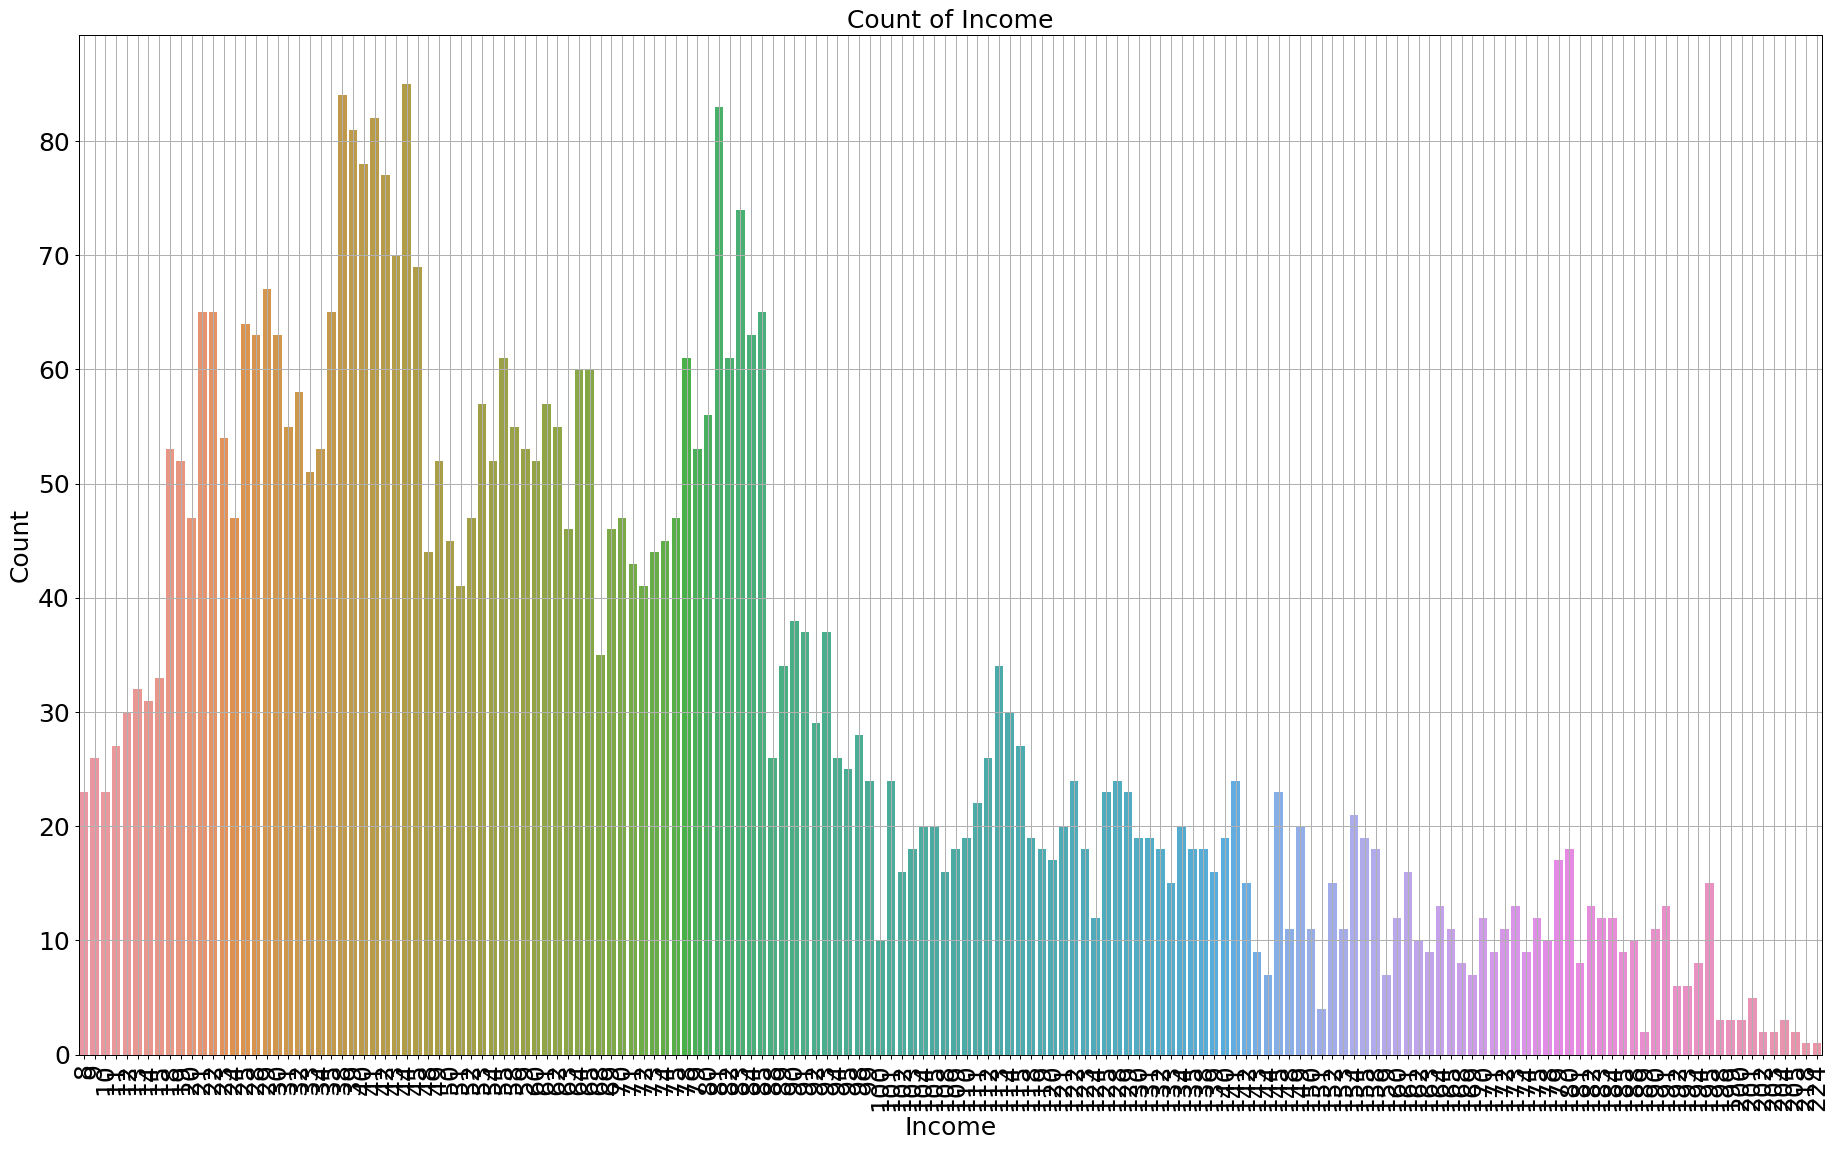

In [42]:
plt.figure(figsize = (25, 15), dpi = 90)
ax = sns.countplot(x = "Income", data = df)
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Income", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Count of Income", fontsize = 20)
plt.grid()

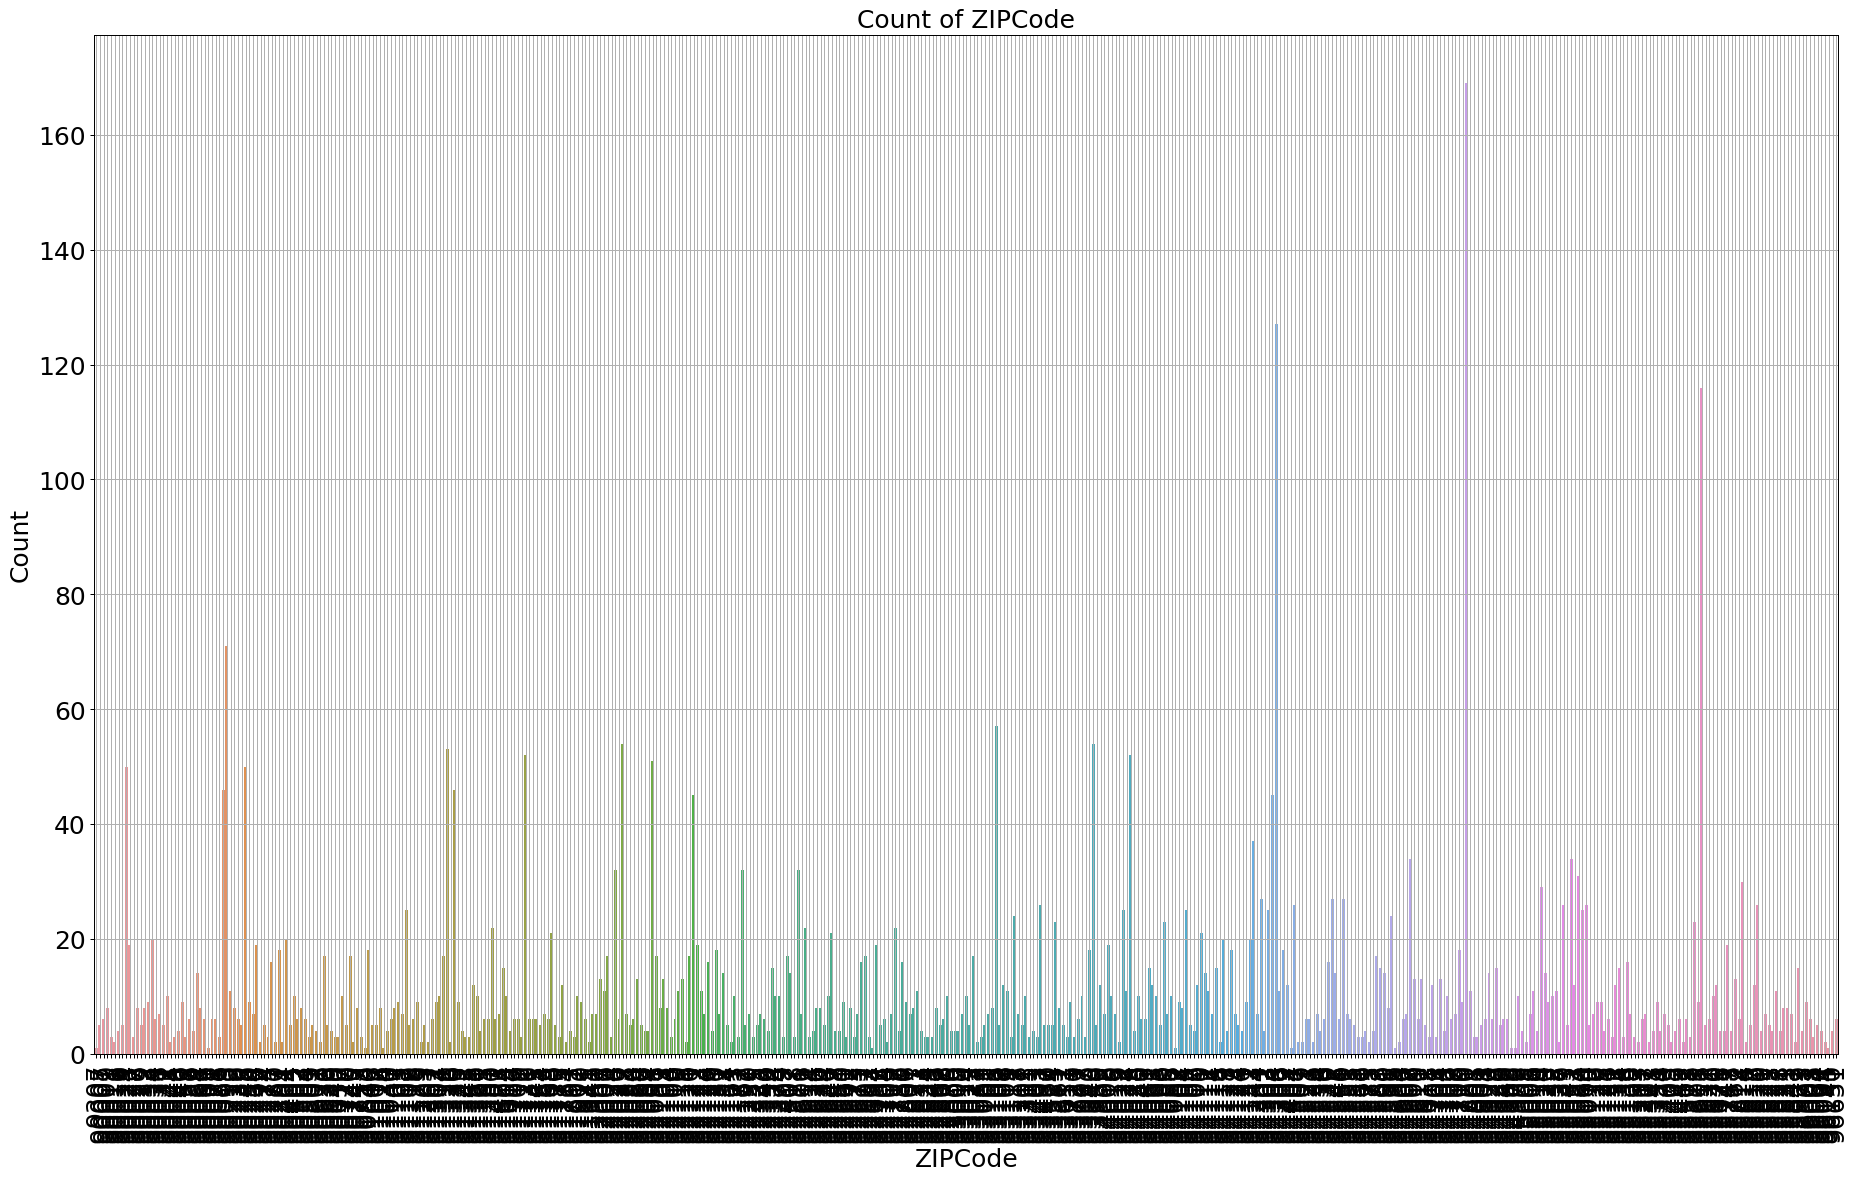

In [43]:
plt.figure(figsize = (25, 15), dpi = 90)
ax = sns.countplot(x = "ZIPCode", data = df)
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("ZIPCode", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Count of ZIPCode", fontsize = 20)
plt.grid()

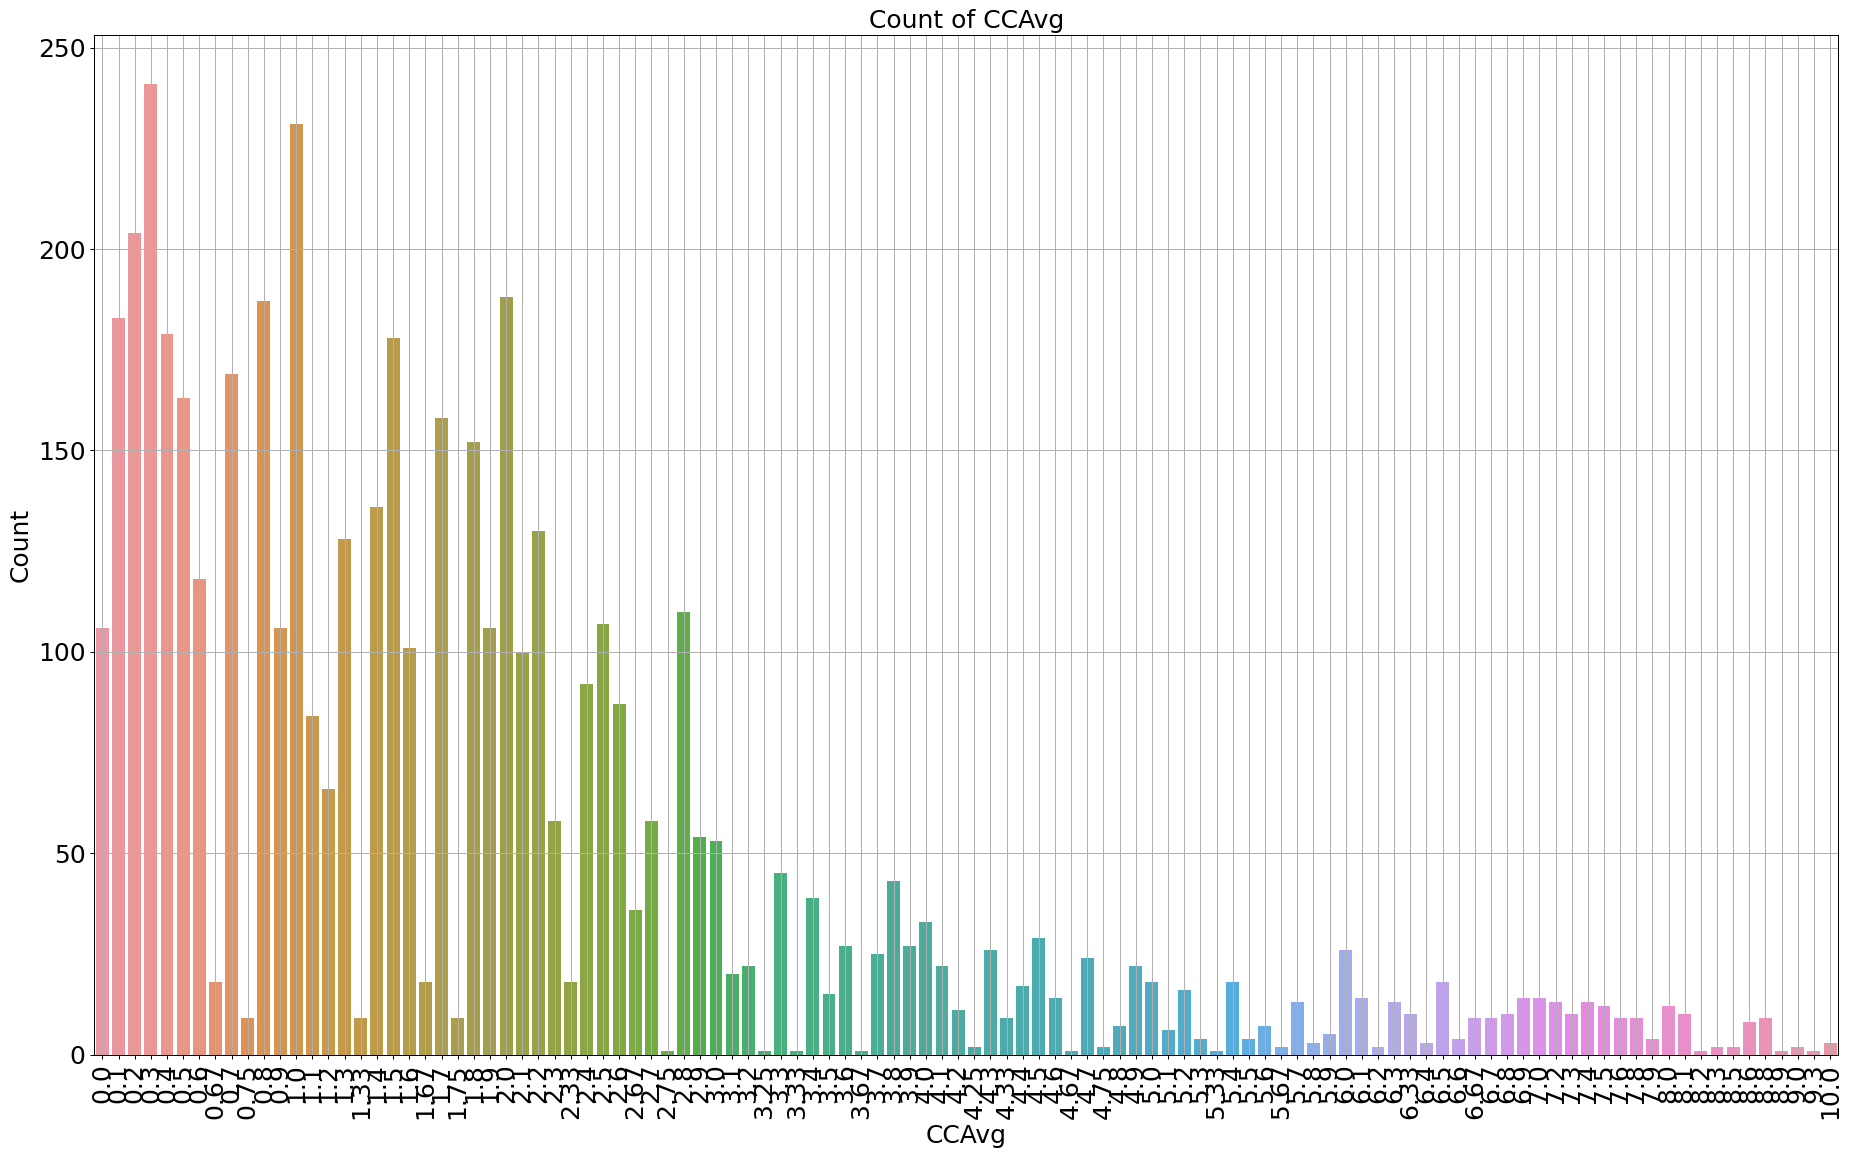

In [44]:
plt.figure(figsize = (25, 15), dpi = 90)
ax = sns.countplot(x = "CCAvg", data = df)
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("CCAvg", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Count of CCAvg", fontsize = 20)
plt.grid()

In [45]:
# Age : 
# از 23 تا 67 سال داریم که تعداد کسانی که وام گرفتن بیشتره
# افراد دارای سن کمتر از 23 و بیشتر از 65 وام نگرفتن
# چگالی داده ها بین سن 35 تا 55 متمرکز شده

In [46]:
# income :
# افراد دارای درآمد کمتر از حدود 55 و بیشتر از 200 وام نگرفتن
# چگالی داده ها در بازه بین 40 تا 100 متمرکز شده است

In [47]:
# zip code :
# در این قسمت یه داده مشکوک کمتر از 20000 وجود داره که شاید مربوط به منطقه ای خاص باشه

In [48]:
# family : 
# تعداد افراد بررسی شده به ترتیب بیشتر دارای این تعداد افراد خانواده بودند 1>2>4>3
# درآمد خانواده به تعداد اعضای خانواده خیلی مربوط نیست یعنی ممکنه درآمد یه خانواده 1 نفره با 4 نفره یکی باشه

In [49]:
# CCavg :
# بالای 9 تمام افراد وام گرفتن
# چگالی داده ها در بازه 0.5 تا 2.5 قرار داره
# خرج در ماه برای خانواده ها به تعداد اون ها بستگی نداره یعنی ممکنه خرج خانواده یه نفره با 4 نفره یکی باشه
# بیشترین خرج برای 3 نفره و یه نفره بوده

In [50]:
# Education :
# بیشتر افراد دارای تحصیلات 1 بعد 3 بعد 2 بودند
# بیشترین درآمدها مربوط به تحصیلات 1 بوده

In [51]:
# Mortgage :
# ارزش خونه صفر برای وام مشکوکه البته میتونه مربوط به مستاجرها باشه اما اینکه با ارزش 0 وام گرفتن شاید درآمد بالا داشتن
# چگالی داده ها در بازه 0 تا 100 وجود داره

In [52]:
# Securities Account :
# فیچر باینری یعنی 0 و 1 داره
# تعداد 0 ها خیلی بستر از 1 ها است

In [53]:
# CD Account :
# فیچر باینری هست یعنی داده ها 0 و 1 هستند
# تعداد 0 ها خیلی بیشتر از 1 هاست

In [54]:
# Online :
# فیچر باینری یعنی 0 و 1 داره  و اکثریت از مزایای انلاین استفاده کردن یعنی تعداد 1 بیشتره

In [55]:
# CreditCard :
# فیچر باینری یعنی 0 و 1 داره
# تعداد 0 ها بستر از 1 ها است 

In [56]:
# Experience_p :
# چگالی داده ها در بازه 10 تا 30 قرار داره
# سابقه کار بالای 42 سال درآمد کم شده و وام نگرفتن

In [57]:
#---------------------###############  LogisticRegression  ##############--------------------#

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [59]:
x = pd.DataFrame(df, columns = ['ID' ,'Age', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'SecuritiesAccount','CDAccount','Online', 'CreditCard', 'Experience_p'])
y = df.PersonalLoan.values.reshape(-1, 1)

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [84]:
logreg = LogisticRegression(C = 8, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1,  l1_ratio = None, max_iter = 100, multi_class = 'auto', n_jobs = None, random_state = 0, solver = 'newton-cg', tol = 0.0001, verbose = 0, warm_start = False)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The lin

In [85]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.9533333333333334


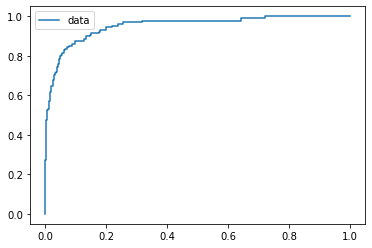

In [86]:
y_pred_proba = logreg.predict_proba(x_test)[: : ,1]
fpr , tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "data")
plt.legend(loc = 2)
plt.show()

In [87]:
from sklearn.metrics import classification_report, confusion_matrix
logreg.classes_

array([0, 1], dtype=int64)

In [88]:
confusion_matrix(y, logreg.predict(x))

array([[4448,   72],
       [ 175,  305]], dtype=int64)

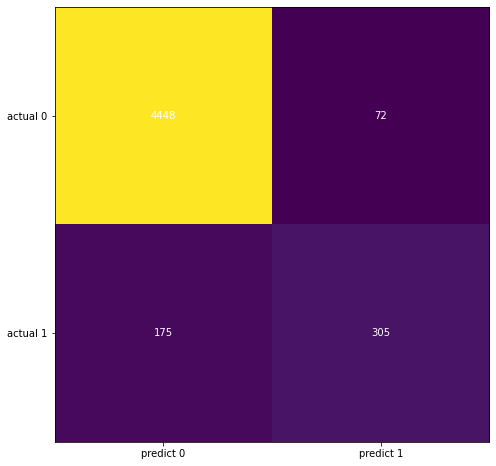

In [89]:
cm = confusion_matrix(y, logreg.predict(x))

fig, ax = plt.subplots(figsize =(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1), ticklabels = ('predict 0', 'predict 1'))
ax.yaxis.set(ticks = (0,1), ticklabels = ('actual 0', 'actual 1'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='white')
        
plt.show()

In [90]:
print(classification_report(y, logreg.predict(x)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4520
           1       0.81      0.64      0.71       480

    accuracy                           0.95      5000
   macro avg       0.89      0.81      0.84      5000
weighted avg       0.95      0.95      0.95      5000



In [91]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [92]:
k_fold = KFold(10)
print(cross_val_score(logreg, x, y.ravel(), cv = k_fold, n_jobs=1))

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iter

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[0.946 0.946 0.942 0.942 0.952 0.95  0.954 0.944 0.962 0.95 ]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


In [93]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.9533333333333334


In [94]:
logreg.predict([[5071, 42, 30, 92037, 3, 1.2, 3, 0, 1, 0, 1, 1, 16]])

array([0], dtype=int64)

In [95]:
#------------------------###########  KNN ############-------------------------#

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
x1 = pd.DataFrame(df, columns = ['ID' ,'Age', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'SecuritiesAccount','CDAccount','Online', 'CreditCard', 'Experience_p'])
y1 = df.PersonalLoan.values.reshape(-1, 1)

In [98]:
x1_test, x1_train, y1_test, y1_train = train_test_split(x1, y1, test_size = 0.3, random_state = 0)

[0.87428571 0.89771429 0.89542857 0.89885714 0.89885714 0.89914286
 0.89914286 0.89914286 0.89885714 0.89942857 0.89942857 0.89942857
 0.89942857 0.89942857 0.89942857 0.89942857 0.89942857 0.89942857
 0.89942857 0.89942857 0.89942857 0.89942857 0.89942857 0.89942857
 0.89942857 0.89942857 0.89942857 0.89942857 0.89942857 0.89942857
 0.89942857 0.89942857 0.89942857 0.89942857 0.89942857 0.89942857
 0.89942857 0.89942857 0.89942857 0.89942857 0.89942857 0.89942857
 0.89942857 0.89942857 0.89942857 0.89942857 0.89942857 0.89942857
 0.89942857 0.89942857]


Text(0, 0.5, 'Testing Accuracy')

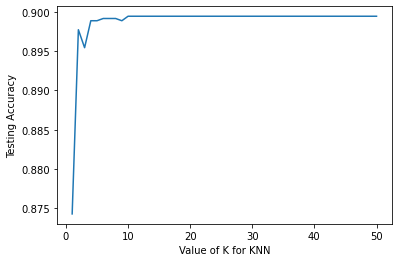

In [99]:
k = 50
acc = np.zeros((k))  # a empty matrix to fill by new values

for i in range(1, k+1):
    clf = KNeighborsClassifier(n_neighbors = i) # n_neighbors is a method
    clf.fit(x1_train, y1_train.ravel())
    y1_pred = clf.predict(x1_test)
    acc[i-1] = metrics.accuracy_score(y1_test, y1_pred)
    
print(acc)

n_neighbors = range(1,k+1)
plt.plot(n_neighbors, acc)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [100]:
print(np.max(acc))
print(np.min(acc))

0.8994285714285715
0.8742857142857143


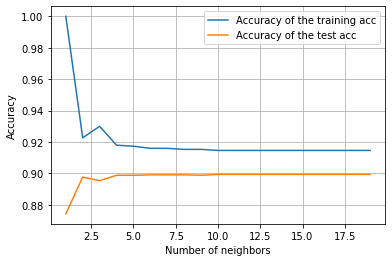

In [101]:
training_acc = []
test_acc = []  #creat 2 empty list

#try KNN for diffrent k_neighbors from 1 to 20

neighbors_setting = range(1,20)
for i in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x1_train, y1_train.ravel())
    training_acc.append(knn.score(x1_train, y1_train))
    test_acc.append(knn.score(x1_test, y1_test))
    
plt.plot(neighbors_setting, training_acc, label ='Accuracy of the training acc')
plt.plot(neighbors_setting, test_acc, label ='Accuracy of the test acc')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

In [102]:
# model for the best knn -> 6

KNN_model = KNeighborsClassifier(n_neighbors = 6)
KNN_model.fit(x1_train, y1_train.ravel())

KNeighborsClassifier(n_neighbors=6)

In [103]:
print(classification_report(y1, KNN_model.predict(x1)))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      4520
           1       0.67      0.00      0.01       480

    accuracy                           0.90      5000
   macro avg       0.79      0.50      0.48      5000
weighted avg       0.88      0.90      0.86      5000



In [104]:
k_fold = KFold(10)
print(cross_val_score(KNN_model, x1, y1.ravel(), cv = k_fold, n_jobs=1))

[0.9   0.908 0.886 0.902 0.888 0.894 0.91  0.914 0.902 0.932]


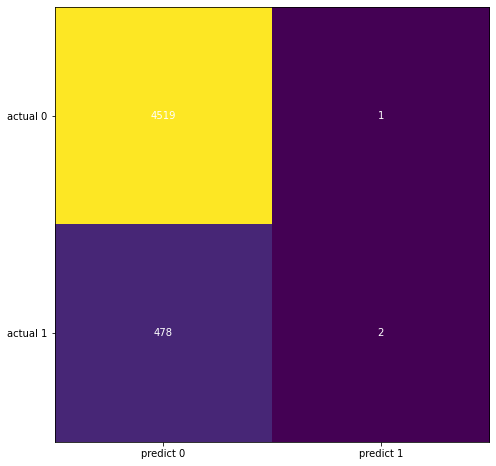

In [105]:
cm = confusion_matrix(y1, KNN_model.predict(x1))

fig, ax = plt.subplots(figsize =(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1), ticklabels = ('predict 0', 'predict 1'))
ax.yaxis.set(ticks = (0,1), ticklabels = ('actual 0', 'actual 1'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='white')
        
plt.show()

In [106]:
y1_pred = KNN_model.predict(x1_test)
print("Accuracy : ", metrics.accuracy_score(y1_test, y1_pred))

Accuracy :  0.8991428571428571


In [107]:
df

,ID,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Experience_p
0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0,1
1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0,19
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0,15
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0,9
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,40,92697,1,1.9,3,0,0,0,0,1,0,3
4996,4997,30,15,92037,4,0.4,1,85,0,0,0,1,0,4
4997,4998,63,24,93023,2,0.3,3,0,0,0,0,0,0,39
4998,4999,65,49,90034,3,0.5,2,0,0,0,0,1,0,40


In [108]:
KNN_model.predict([[5071, 42, 30, 92037, 3, 1.2, 3, 0, 1, 0, 1, 1, 16]])

array([0], dtype=int64)

In [109]:
#-------------------##############  Naive Bayes #############---------------------#

In [110]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB

In [111]:
x2 = pd.DataFrame(df, columns = ['ID' ,'Age', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'SecuritiesAccount','CDAccount','Online', 'CreditCard', 'Experience_p'])
y2 = df.PersonalLoan.values.reshape(-1, 1)

In [112]:
x2_test, x2_train, y2_test, y2_train = train_test_split(x2, y2, test_size = 0.3, random_state = 0)

In [113]:
from sklearn.metrics import classification_report, confusion_matrix
clf.classes_

array([0, 1], dtype=int64)

In [114]:
# in our feautres there are both continuous and discrete data so use Multinomial NB

In [115]:
clf = MultinomialNB()
clf.fit(x2_train, y2_train.ravel())
y2_pred = clf.predict(x2_test)

In [116]:
print("Accuracy :", metrics.accuracy_score(y2_test, y2_pred))

Accuracy : 0.6851428571428572


In [117]:
confusion_matrix(y2, clf.predict(x2))

array([[3144, 1376],
       [ 183,  297]], dtype=int64)

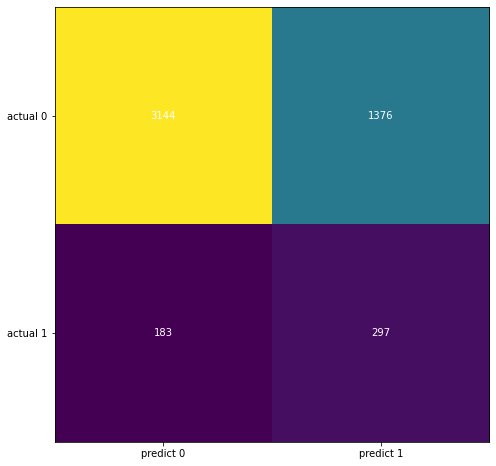

In [118]:
cm = confusion_matrix(y2, clf.predict(x2))

fig, ax = plt.subplots(figsize =(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1), ticklabels = ('predict 0', 'predict 1'))
ax.yaxis.set(ticks = (0,1), ticklabels = ('actual 0', 'actual 1'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='white')
        
plt.show()

In [119]:
print(classification_report(y2, clf.predict(x2)))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80      4520
           1       0.18      0.62      0.28       480

    accuracy                           0.69      5000
   macro avg       0.56      0.66      0.54      5000
weighted avg       0.87      0.69      0.75      5000



In [120]:
k_fold = KFold(15)
print(cross_val_score(clf, x2, y2.ravel(), cv = k_fold, n_jobs=1))

[0.18263473 0.11976048 0.44610778 0.5748503  0.66167665 0.66666667
 0.74774775 0.76276276 0.78678679 0.81981982 0.85885886 0.87987988
 0.88888889 0.90690691 0.86486486]


In [121]:
df2 = df[df.index>2000]
df.reset_index(drop=True, inplace=True)
df2

,ID,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Experience_p
2001,2002,44,128,94928,2,3.25,2,0,1,0,0,0,1,17
2002,2003,30,142,92126,3,4.20,1,359,1,0,0,0,0,4
2003,2004,44,124,90277,1,4.70,1,0,0,0,0,1,1,20
2004,2005,30,44,92704,1,1.90,3,143,0,0,0,0,0,4
2005,2006,47,170,90254,2,6.50,2,0,1,0,1,1,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,40,92697,1,1.90,3,0,0,0,0,1,0,3
4996,4997,30,15,92037,4,0.40,1,85,0,0,0,1,0,4
4997,4998,63,24,93023,2,0.30,3,0,0,0,0,0,0,39
4998,4999,65,49,90034,3,0.50,2,0,0,0,0,1,0,40


In [122]:
x3 = pd.DataFrame(df2, columns = ['ID' ,'Age', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'SecuritiesAccount','CDAccount','Online', 'CreditCard', 'Experience_p'])
y3 = df2.PersonalLoan.values.reshape(-1, 1)

In [123]:
x3_test, x3_train, y3_test, y3_train = train_test_split(x3, y3, test_size = 0.3, random_state = 0)

In [124]:
clf1 = MultinomialNB()
clf1.fit(x3_train, y3_train.ravel())
y3_pred = clf1.predict(x3_test)

In [125]:
print("Accuracy :", metrics.accuracy_score(y3_test, y3_pred))

Accuracy : 0.7370176274416389


In [126]:
confusion_matrix(y3, clf1.predict(x3))

array([[2080,  639],
       [ 119,  161]], dtype=int64)

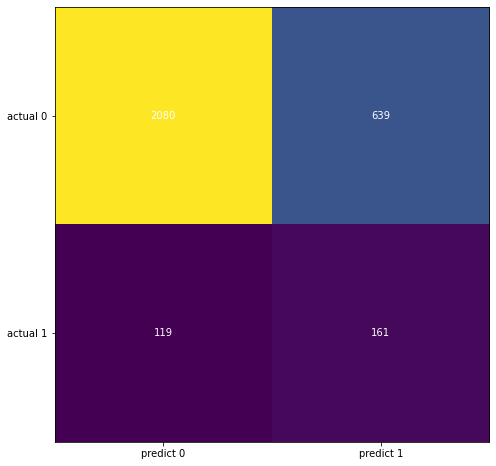

In [127]:
cm = confusion_matrix(y3, clf1.predict(x3))

fig, ax = plt.subplots(figsize =(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1), ticklabels = ('predict 0', 'predict 1'))
ax.yaxis.set(ticks = (0,1), ticklabels = ('actual 0', 'actual 1'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='white')
        
plt.show()

In [128]:
print(classification_report(y3, clf1.predict(x3)))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85      2719
           1       0.20      0.57      0.30       280

    accuracy                           0.75      2999
   macro avg       0.57      0.67      0.57      2999
weighted avg       0.88      0.75      0.79      2999



In [129]:
clf1.predict([[5071, 42, 30, 92037, 3, 1.2, 3, 0, 1, 0, 1, 1, 16]])

array([0], dtype=int64)

In [233]:
#-------########## Compare ##########---------#

In [130]:
# LogReg ->        precision    recall  f1-score   support

#           0       0.96      0.98      0.97      4520
#           1       0.81      0.64      0.71       480

#    accuracy                           0.95      5000
#   macro avg       0.89      0.81      0.84      5000
#weighted avg       0.95      0.95      0.95      5000


# KNN_Model ->    precision    recall  f1-score   support

#           0       0.90      1.00      0.95      4520
#           1       0.67      0.00      0.01       480

#    accuracy                           0.90      5000
#   macro avg       0.79      0.50      0.48      5000
#weighted avg       0.88      0.90      0.86      5000



# clf ->        precision   recall   f1-score   support

#          0       0.95      0.76      0.85      2719
#          1       0.20      0.57      0.30       280

#    accuracy                           0.75      2999
#   macro avg       0.57      0.67      0.57      2999
#weighted avg       0.88      0.75      0.79      2999


In [131]:
# logreg selected

In [132]:
# improve logreg model

In [133]:
def check(Dimension,testsize):
    acc = 0.92
    for column in x:
        new_col_name = column + str(Dimension)
        new_col_val = x[column]**Dimension
        x.insert(0, new_col_name, new_col_val)
        X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
        new_model = LogisticRegression(solver = 'liblinear')
        new_model.fit(X_train, Y_train)
        Y_pred = new_model.predict(X_test)
        acc_new = metrics.accuracy_score(Y_test, Y_pred)
        if acc_new < acc:
            x.drop([new_col_name], axis=1, inplace=True)
        else:
            acc = acc_new
    print("acc : ",acc)

check(2,0.2)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

acc :  0.92


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

In [134]:
x

,ID,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,Experience_p
0,1,25,49,91107,4,1.6,1,0,1,0,0,0,1
1,2,45,34,90089,3,1.5,1,0,1,0,0,0,19
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,15
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,9
4,5,35,45,91330,4,1.0,2,0,0,0,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,40,92697,1,1.9,3,0,0,0,1,0,3
4996,4997,30,15,92037,4,0.4,1,85,0,0,1,0,4
4997,4998,63,24,93023,2,0.3,3,0,0,0,0,0,39
4998,4999,65,49,90034,3,0.5,2,0,0,0,1,0,40


In [135]:
x.shape

(5000, 13)

In [136]:
k_fold = KFold(n_splits = 30) 
results = (cross_val_score(logreg, x, y.ravel(), cv=k_fold, n_jobs=1))
print(results)
print(np.mean(results))

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iter

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increas

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not c

[0.96407186 0.92814371 0.95209581 0.95808383 0.94610778 0.94610778
 0.93413174 0.94610778 0.94610778 0.92215569 0.94610778 0.94610778
 0.97005988 0.94610778 0.95209581 0.94610778 0.95808383 0.94011976
 0.98203593 0.94610778 0.93975904 0.92168675 0.94578313 0.95783133
 0.95180723 0.95783133 0.96987952 0.92168675 0.96987952 0.95783133]
0.9490007935935357


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


In [246]:
df

,ID,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Experience_p
0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0,1
1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0,19
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0,15
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0,9
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,40,92697,1,1.9,3,0,0,0,0,1,0,3
4996,4997,30,15,92037,4,0.4,1,85,0,0,0,1,0,4
4997,4998,63,24,93023,2,0.3,3,0,0,0,0,0,0,39
4998,4999,65,49,90034,3,0.5,2,0,0,0,0,1,0,40


In [137]:
# Normalize

In [138]:
x.insert(0, "Target", y)
DataFrame = x
DataFrame
Scaler = preprocessing.StandardScaler().fit(DataFrame)
norm = Scaler.transform(DataFrame.astype(float))
print(norm[0:1])

[[-0.32587527 -1.73170443 -1.77441684 -0.53822878 -0.96411408  1.39741398
  -0.19338544 -1.04907792 -0.55552393  2.92891517 -0.25354028 -1.21661774
  -0.64531434 -1.67640794]]


In [139]:
X_norm = DataFrame.drop(["Target"], axis = 1)
Y_norm = DataFrame["Target"].values.reshape(-1, 1)

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y_norm, test_size = 0.3, random_state = 0)
logreg_n = LogisticRegression(solver = 'liblinear')
logreg_n.fit(X_train, Y_train)
Y_predn = logreg_n.predict(X_test)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [141]:
print("Accuracy : ", metrics.accuracy_score(Y_test, Y_predn))

Accuracy :  0.92


In [142]:
# New Data

In [143]:
DF2 = pd.DataFrame({"ID":[5071],
                   "Age":[42],
                   "Income":[30],
                   "ZIPCode":[92037],
                   "Family":[3],
                   "CCAvg":[1.2],
                   "Education":[3],
                   "Mortgage":[0],
                   "SecuritiesAccount":[1],
                   "CDAccount":[0],
                   "Online":[1],
                   "CreditCard":[1],
                   "Experience_p":[16]})

In [144]:
data2 = df.append(DF2)
data2

,ID,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Experience_p
0,1,25,49,91107,4,1.6,1,0,0.0,1,0,0,0,1
1,2,45,34,90089,3,1.5,1,0,0.0,1,0,0,0,19
2,3,39,11,94720,1,1.0,1,0,0.0,0,0,0,0,15
3,4,35,100,94112,1,2.7,2,0,0.0,0,0,0,0,9
4,5,35,45,91330,4,1.0,2,0,0.0,0,0,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4997,30,15,92037,4,0.4,1,85,0.0,0,0,1,0,4
4997,4998,63,24,93023,2,0.3,3,0,0.0,0,0,0,0,39
4998,4999,65,49,90034,3,0.5,2,0,0.0,0,0,1,0,40
4999,5000,28,83,92612,3,0.8,1,0,0.0,0,0,1,1,4


In [145]:
x_train_2 = data2[['ID' ,'Age', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'SecuritiesAccount','CDAccount','Online', 'CreditCard', 'Experience_p']][:5000]
y_train_2 = data2[['PersonalLoan']][:5000]

In [146]:
x_test_2 = data2[['ID' ,'Age', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'SecuritiesAccount','CDAccount','Online', 'CreditCard', 'Experience_p']][5000:]

In [147]:
logreg_2 = LogisticRegression(C = 8, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1,  l1_ratio = None, max_iter = 100, multi_class = 'auto', n_jobs = None, random_state = 0, solver = 'newton-cg', tol = 0.0001, verbose = 0, warm_start = False)
logreg_2.fit(x_train_2, y_train_2)
y_pred_2 = logreg_2.predict(x_test_2)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The lin

In [148]:
y_pred_2

array([0.])

In [149]:
# So the best accuracy is 0.9533333333333334 from LogisticRegression.